### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
female_data=pd.read_csv('female_complete.csv')

In [3]:
female_data['Medal'] = female_data['Medal'].fillna('NA')

In [4]:
male_data=pd.read_csv('male_gdp.csv')
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [5]:
female_swim = female_data[female_data['Sport'] == 'Tennis']

In [6]:
female_swim['Sport'].describe

<bound method NDFrame.describe of 12222    Tennis
12223    Tennis
12224    Tennis
12225    Tennis
12226    Tennis
          ...  
12882    Tennis
12883    Tennis
12884    Tennis
12885    Tennis
12886    Tennis
Name: Sport, Length: 665, dtype: object>

In [7]:
female_swim['Medal'].describe

<bound method NDFrame.describe of 12222        NA
12223        NA
12224        NA
12225        NA
12226        NA
          ...  
12882        NA
12883        NA
12884    Bronze
12885        NA
12886        NA
Name: Medal, Length: 665, dtype: object>

In [8]:
female_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 12222 to 12886
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      665 non-null    int64  
 1   Unnamed: 0_x    665 non-null    int64  
 2   ID              665 non-null    int64  
 3   Name            665 non-null    object 
 4   Sex             665 non-null    object 
 5   Age             665 non-null    float64
 6   Height          665 non-null    float64
 7   Weight          665 non-null    float64
 8   NOC             665 non-null    object 
 9   Games           665 non-null    object 
 10  Year            665 non-null    int64  
 11  Season          665 non-null    object 
 12  City            665 non-null    object 
 13  Sport           665 non-null    object 
 14  Event           665 non-null    object 
 15  Medal           665 non-null    object 
 16  Team            665 non-null    object 
 17  Unnamed: 0_y    665 non-null 

In [9]:
# Extract Response and Predictors
y = pd.DataFrame(female_swim["Medal"]).astype('category')
X = pd.DataFrame(female_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [10]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (498, 1) (498, 6)
Test Set  : (167, 1) (167, 6)


In [11]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [12]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
12453,24.0,68.0,173.0,3.540000e+12,80425823.0,44015.713709,NA
12672,30.0,59.0,167.0,1.540000e+12,22728254.0,67757.074521,NA
12270,21.0,60.0,175.0,1.800000e+11,46258200.0,3891.201992,NA
12572,23.0,78.0,182.0,6.130000e+11,20127400.0,30455.995310,NA
12731,19.0,62.0,180.0,2.034220e+10,1988925.0,10227.736770,NA
...,...,...,...,...,...,...,...
12467,25.0,70.0,183.0,2.650000e+12,65637239.0,40373.422776,NA
12803,30.0,64.0,168.0,1.120000e+11,26000000.0,4307.692308,NA
12337,22.0,60.0,176.0,5.340000e+11,38125759.0,14006.278537,NA
12528,26.0,66.0,179.0,1.040000e+11,10107146.0,10289.749451,NA


In [13]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        614
Bronze     17
Gold       17
Silver     17
Name: Medal, dtype: int64


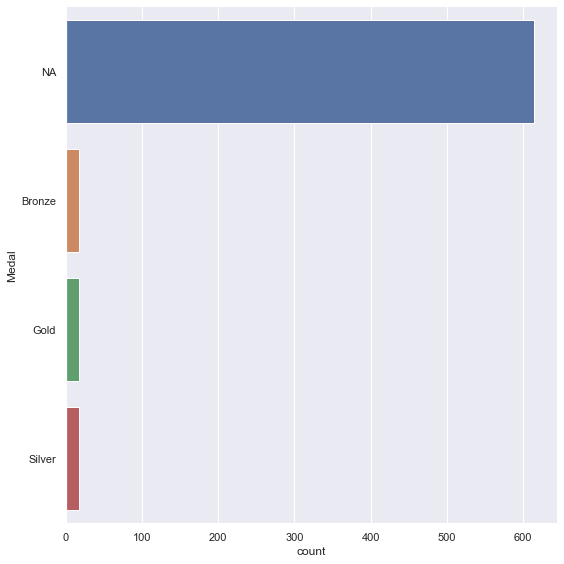

In [14]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(female_swim["Medal"].unique()))

# Pokemons of each Primary Type
print(female_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = female_swim, kind = "count", height = 8)

In [15]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(498, 6) (498, 1)


In [16]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(1820, 6) (1820, 1)


In [17]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,24.000000,68.000000,173.000000,3.540000e+12,8.042582e+07,44015.713709,NA
1,30.000000,59.000000,167.000000,1.540000e+12,2.272825e+07,67757.074521,NA
2,21.000000,60.000000,175.000000,1.800000e+11,4.625820e+07,3891.201992,NA
3,23.000000,78.000000,182.000000,6.130000e+11,2.012740e+07,30455.995310,NA
4,19.000000,62.000000,180.000000,2.034220e+10,1.988925e+06,10227.736770,NA
...,...,...,...,...,...,...,...
1815,25.559302,63.406976,171.644185,1.851535e+12,5.333614e+07,34859.877174,Silver
1816,29.310802,59.000000,169.551800,1.325474e+12,4.428093e+07,29751.082841,Silver
1817,28.015667,68.013708,173.023500,3.509610e+12,8.313858e+07,42126.543284,Silver
1818,27.675500,68.108167,173.486751,3.381568e+12,8.591673e+07,40448.501118,Silver


In [18]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
12418,26.0,57.0,170.0,4.960000e+09,2.334690e+07,212.447942
12339,27.0,58.0,170.0,3.743853e+10,2.244297e+07,1668.162731
12305,18.0,60.0,173.0,2.920000e+12,6.437499e+07,45359.230347
12874,29.0,57.0,164.0,8.560000e+12,1.350695e+09,6337.478113
12764,23.0,56.0,170.0,5.724054e+10,5.372000e+06,10655.349058
...,...,...,...,...,...,...
12608,21.0,60.0,170.0,2.160000e+11,7.308800e+06,29553.415061
12829,24.0,75.0,180.0,7.420000e+11,3.076970e+07,24114.632252
12615,30.0,61.0,173.0,1.120000e+13,1.378665e+09,8123.800923
12663,31.0,55.0,165.0,1.230000e+13,2.928053e+08,42007.436628


Number of Medal Types : 4
Bronze    455
Gold      455
NA        455
Silver    455
Name: Medal, dtype: int64


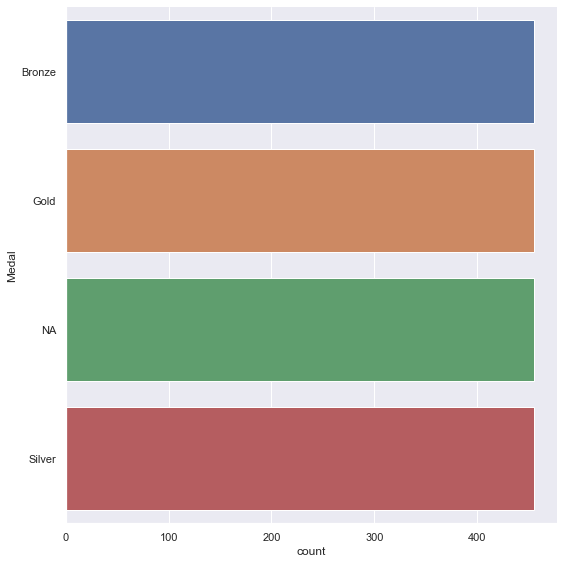

In [19]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

# Pokemons of each Primary Type
print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (1365, 1) (1365, 6)
Test Set  : (455, 1) (455, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.978021978021978

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9428571428571428



<AxesSubplot:>

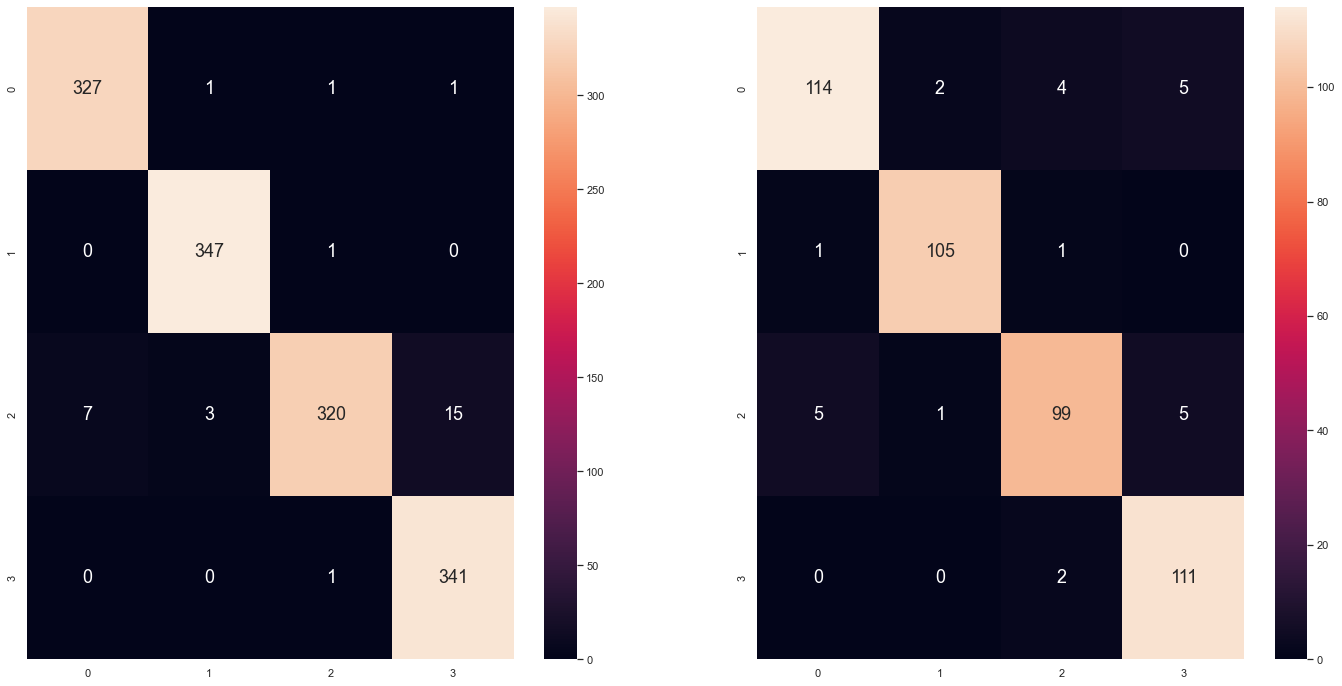

In [20]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 10)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

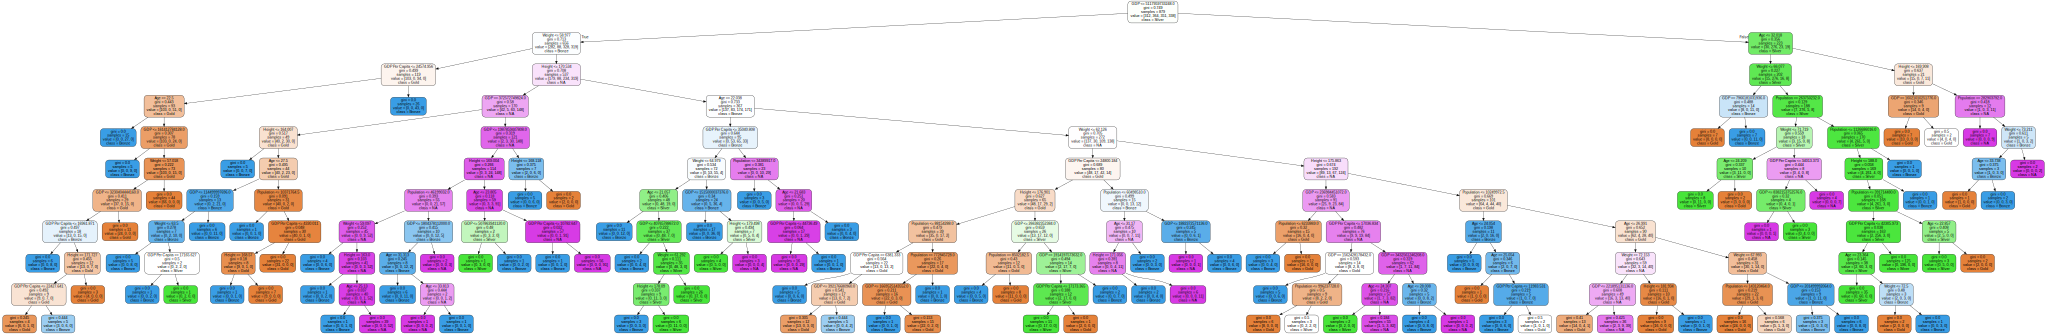

In [21]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [25]:
graph.render("Tree_female_tennis")

'Tree_female_tennis.pdf'

### Predictions

In [23]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.8383233532934131


<AxesSubplot:>

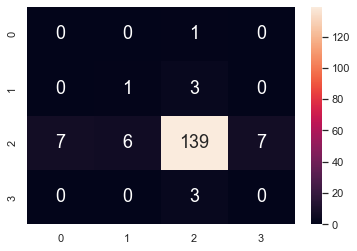

In [24]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})